# Redes Neurais Convolucionais

# Introdução

Uma Rede Neural Convolucional (CNN, do inglês Convolutional Neural Network) é um tipo de rede neural artificial projetada para processar e analisar dados que têm uma estrutura de grade regular, como imagens. As CNNs são especialmente eficazes em tarefas de visão computacional, como classificação de imagens, detecção de objetos e segmentação de imagens, devido à sua capacidade de capturar padrões espaciais e hierárquicos nas imagens.

A imagem a seguir (retirada do artigo [Computer science: The learning machines](https://www.nature.com/articles/505146a)) ilustra a capacidade de uma CNN para capturar padrões visuais hierárquicos em uma imagem.

<center><img src='https://media.springernature.com/w300/springer-static/image/art%3A10.1038%2F505146a/MediaObjects/41586_2014_Article_BF505146a_Figc_HTML.jpg'></center>

A figura a seguir apresenta uma arquitetura típica de uma rede neural convolucional.

<center><img src='https://editor.analyticsvidhya.com/uploads/36181719641_uAeANQIOQPqWZnnuH-VEyw.jpeg'></center>


Uma rede neural convolucional é usualmente composta de dois estágios sucessivos. Cada um desses estágios é composto de uma sequência de camadas. 

- O primeiro estágio é responsável por extrair as características (*features*) relevantes do objeto de entrada (e.g., imagem). Esse estágio é normalmente composto por camadas de convolução e de subamostragem (*pooling*). 

- Já o segundo estágio é responsável por realizar a tarefa a que a rede se pretende. Esse segundo estágio é composto por camadas completamente conectadas (as mesmas encontradas em redes [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron)).

A organização descrita acima é ilustrada na figura abaixo ([fonte](https://en.wikipedia.org/wiki/Convolutional_neural_network)). Essa figura apresenta dois modelos populares de rede convolução, [LeNet](https://en.wikipedia.org/wiki/LeNet) e [AlexNet](https://en.wikipedia.org/wiki/AlexNet). Essas redes foram originalmente propostas para treinamento sobre os conjuntos [MNIST](http://yann.lecun.com/exdb/mnist/) e [Imagenet](https://www.image-net.org), respectivamente.

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/1280px-Comparison_image_neural_networks.svg.png'  width="600"></center>

### Operação de convolução

A figura abaixo ([fonte](https://www.mathworks.com/help/signal/ref/xcorr2.html)) apresenta um exemplo da operação de convolução 2D. Nessa figura, a matriz no canto direito superior é o filtro. No canto esquerdo inferior é apresentada a  matriz sobre a qual a convolução deve ser aplicada (i.e., o plano de entrada). 

<center><img src='https://i.imgur.com/iDfpijK.png'></center>

Em um dado momento da aplicação da operação, o filtro vai estar alinhado com a parte superior direita da matriz de entrada, conforme mostra a figura. Nesse alinhamento, o valor calculado é $585$, resultante da seguinte expressão:

$$
1 \times 8 + 7 \times 3+13 \times 4+8 \times 1+14 \times 5+20 \times 9+15 \times 6+16 \times 7+22 \times 2=585.
$$

A operação que produz o valor $585$ é denominada **correlação cruzada** (_cross-correlation_). De forma simplificada, a correlação cruzada sobre duas matrizes $A$ e $B$ corresponde a multiplicar os elementos correspondentes de $A$ e $B$ e em seguida realizar a soma desses produtos. Vamos denotar essa operação usando o símbolo $\star$. Repare que o resultado da operação de correlação cruzada é um único valor $v \in \Re$.

$$
v = A \star B
$$

O valor computado no alinhamento acima corresponde a uma das entradas no plano de saída. O plano de saída completo é obtido considerando todos os possíveis alinhamentos do filtro com a matriz de entrada. O plano de saída para o exemplo acima é apresentada abaixo, na qual o valor $585$, resultante do alinhamento apresentado na figura acima, está destacado.

\begin{pmatrix}
 405 & 570 & \mathbf{585}\\
 550 & 615 & 730\\
 595 & 760 & 575
\end{pmatrix}

A figura acima ilustra a aplicação da correlação cruzada em um alinhamento específico do filtro sobre o plano de entrada. Contudo, note que a operação descrita acima é aplicada aos diversos alinhamentos possíveis entre o plano de entrada e o filtro. Veja a imagem abaixo.

<center><img src='https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_no_strides.gif?raw=true'></center>

Por vezes, é desejável manter as dimensões dos planos de entrada e de saída. Nesse caso, as dimensões do plano de entrada são primeiramente aumentadas para em seguida realizar a aplicação da convolução cruzada. Essa extensão do plano de entrada é denominada **padding**. Como exemplo, a animação abaixo ilustra esquematicamente a correlação cruzada aplicada a uma plano de entrada com padding igual a 2. 
<center><img src='https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/arbitrary_padding_no_strides.gif?raw=true'></center>

Outra variação da correlação cruzada diz respeito à distância entre diferentes alinhamentos do filtro sobre o plano de entrada. Essa distância é chamada de **stride**. Nas imagens anteriores, foi usado stride igual a 1, i.e., o filtro é deslocado uma posição para produzir o próximo alinhamento. Já na imagem a seguir, o stride foi definido como 2.

<center><img src='https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_strides.gif?raw=true'></center>

Há uma expressão que permite computar a dimensão $W_{\text{out}}$ do plano de saída, uma vez definidos as dimensões do filtro $K$, as dimensões do plano de entrada $W_{\text{in}}$, o padding $P$ e o stride $S$. Essa expressão é apresentada a seguir.

$$
W_{\text{out}} = \frac{(W_{\text{in}} - K + 2\times P)}{S}+1
$$

Na expressão acima:

- $W_{\text{out}}$ é a dimensão do plano de saída;
- $W_{\text{in}}$ é a dimensão do plano de entrada;
- $K$ é a dimensão do filtro (_kernel_);
- $P$ é o valor do preenchimento (_padding_);
- $S$ é o valor do salto (_stride_).

Se voltarmos ao exemplo da figura abaixo, $W_{in}=5$, $K=3$. Se definirmos $P=0$ e $S=1$, isso irá resultar em $W_{out} = 3$.

<center><img src='https://i.imgur.com/iDfpijK.png'></center>


## Camada de convolução (CONV)

Camadas de convolução são usadas para extrair as características visuais relevantes dos objetos de entrada. Em uma rede neural de convolução há normalmente várias camadas de convolução sucessivas. Camdas de convolução iniciais são responsáveis por extrair características visuais simples (arestas verticais, horizontais, inclinadas, etc.). Essas características visuais mais simples são então usadas pelas camadas de convolução seguintes para detectar padrões visuais cada vez mais complexos. Isso é ilustrado na imagem a seguir ([fonte](https://www.ais.uni-bonn.de/papers/ki2012_schulz_deeplearning.pdf)).

<center><img src='https://i.imgur.com/FLPS1Qb.png'></center>

Os neurônios em uma CONV são organizados em uma estrutura tridimensional (volume). Posto que uma CONV é uma estrutura tridimensional, esse tipo de camada possui altura, largura e profundidade. Pelo mesmo motivo, tanto a entrada quanto a saída de uma CONV são volumes. Veja a imagem a seguir ([fonte](https://cs231n.github.io)).

<center><img src='https://i.imgur.com/ExLnMKF.jpg'></center>

O conjunto de neurônios localizados na mesma coluna de profundidade de uma CONV são conectados à mesma região do volume de entrada. Essa região é conhecida como o _campo receptivo local_ desses neurônios. Veja a imagem abaixo ([fonte](https://cs231n.github.io)).

<center><img src='https://cs231n.github.io/assets/cnn/depthcol.jpeg'></center>


Em uma rede MLP, cada camada de neurônios está organizada conforme uma estrutura unidimensional.
<center><img src='https://cs231n.github.io/assets/nn1/neural_net2.jpeg'></center>

Já em uma camada de convolução, os neurônios são organizados em uma estrutura tridimensional. Posto que uma CONV é uma estrutura tridimensional, esse tipo de camada possui altura, largura e profundidade. Veja a imagem a seguir ([fonte](https://cs231n.github.io)). Além disso, tanto a entrada quanto a saída de uma CONV são também tensores tri-dimensionais denominados *volumes*.

<center><img src='https://cs231n.github.io/assets/cnn/cnn.jpeg'></center>

O conjunto de neurônios localizados na mesma coluna de profundidade de uma CONV são conectados à mesma região do volume de entrada. Essa região é conhecida como o _campo receptivo local_ desses neurônios. Veja a imagem abaixo ([fonte](https://cs231n.github.io)).

<center><img src='https://cs231n.github.io/assets/cnn/depthcol.jpeg' ></center>

## Convolução 2D em numpy

In [132]:
import numpy as np

# adapted from https://stackoverflow.com/questions/2448015/2d-convolution-using-python-and-numpy

def convolution2d(image, kernel, stride, bias):
  k, n = kernel.shape
  assert k == n
  y, x = image.shape
  y = (y - k) // stride + 1
  x = (x - k) // stride + 1
  new_image = np.zeros((y,x))
  for i in range(y):
    for j in range(x):
      new_image[i][j] = (np.sum(image[i:i+k, j:j+k]*kernel) + bias)
  return new_image

In [133]:
input = np.array([[17, 24,  1,  8, 15],
                  [23,  5,  7, 14, 16],
                  [4,  6, 13, 20, 22],
                  [10, 12, 19, 21,  3],
                  [11, 18, 25,  2,  9]])

kernel = np.array([[8, 1, 6],
                   [3, 5, 7],
                   [4, 9, 2]])

stride = 1

bias = np.array([0])

output = convolution2d(input, kernel, stride, bias)

print('input:\n', input)
print('input shape:', input.shape)
print('kernel shape:', kernel.shape)
print('output shape:', output.shape)
print('output:\n', output)

input:
 [[17 24  1  8 15]
 [23  5  7 14 16]
 [ 4  6 13 20 22]
 [10 12 19 21  3]
 [11 18 25  2  9]]
input shape: (5, 5)
kernel shape: (3, 3)
output shape: (3, 3)
output:
 [[405. 570. 585.]
 [550. 615. 730.]
 [595. 760. 575.]]


/tmp/ipykernel_1008/3404331207.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_image[i][j] = (np.sum(image[i:i+k, j:j+k]*kernel) + bias)


## Convolução 2D em PyTorch

In [134]:
import torch
import torch.nn as nn

conv_layer = nn.Conv2d(in_channels = 1, out_channels=1, kernel_size = 3, stride=1, padding = 0)

arr = np.array([[8, 1, 6],
                [3, 5, 7],
                [4, 9, 2]])

kernel = torch.tensor(arr, dtype = torch.float32)
nb_channels = 1
kernel = kernel.view(1, 1, 3, 3).repeat(1, nb_channels, 1, 1)

conv_layer.weight.data = kernel
conv_layer.bias.data = torch.tensor([0], dtype = torch.float32)

tensor_input = torch.tensor(input, dtype = torch.float32)
tensor_input = tensor_input.unsqueeze(0)
tensor_input = tensor_input.unsqueeze(0)
tensor_output = conv_layer(tensor_input)

print('input:\n', tensor_input)
print('kernel shape:', kernel.shape)
print('input shape:', tensor_input.shape)
print('output shape:', tensor_output.shape)
print('output:\n', tensor_output)

input:
 tensor([[[[17., 24.,  1.,  8., 15.],
          [23.,  5.,  7., 14., 16.],
          [ 4.,  6., 13., 20., 22.],
          [10., 12., 19., 21.,  3.],
          [11., 18., 25.,  2.,  9.]]]])
kernel shape: torch.Size([1, 1, 3, 3])
input shape: torch.Size([1, 1, 5, 5])
output shape: torch.Size([1, 1, 3, 3])
output:
 tensor([[[[405., 570., 585.],
          [550., 615., 730.],
          [595., 760., 575.]]]], grad_fn=<ConvolutionBackward0>)


## Caso geral

Os exemplos acima ilustram a aplicação da convolução 2D no caso particular em que a entrada é um único **plano de entrada**, i.e., um único tensor que possui apenas um canal. Nesses mesmos exemplos, a saída também é um único tensor com apenas um canal.

Quando consideramos uma camada de convolução 2D em um rede neural convolucional, 
- a entrada pode ser um lote composto de vários tensores, e cada um desses tensores é um **volume** (i.e., um tensor 3D) que pode possuir vários canais. 
- a saída é outro lote (de mesmo tamanho da entrada) de volumes, 
- os volumes de entrada e de saída podem conter uma quantidade de canais diferentes. 

Nesse caso geral, a expressão geral usada pelo [PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) para computar a convolução 2D é a seguinte:

$$
\text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) + \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i,k)
$$

Na expressão acima:
- considera-se um tensor de entrada com dimensões $(N,C_{in},H,W)$
- considera-se um tensor de saída com dimensões $(N,C_{out},H_{out},W_{out})$
- $⋆$ é o operador de correlação cruzada 2D,
- $N$ é o tamanho do lote,
- $C$ denota o número de canais,
- $H$ é a altura dos planos de entrada em pixels,
- $W$ é a largura dos planos de entrada em pixels.

Uma maneira de entender a expressão acima é analisar a animação disponível na seção _Convolution Demo_ nesta [página](https://cs231n.github.io/convolutional-networks/#conv).


## Filtros de imagens

Um filtro de imagem (_image filter_, _image kernel_) é uma pequena matriz usada para aplicar efeitos sobre uma imagem. Programas como Photoshop e Gimp fornecem filtros para diversas transformações, como desfoque, nitidez, contorno ou relevo. 

Filtros também são usados ​​no aprendizado de máquina para realizar _extração de recursos_ (_feature extraction_), uma técnica para determinar as partes mais importantes de uma imagem. Neste contexto, o processo é referido de forma mais geral como **convolução**.

Para exemplificar a aplicação de filtros sobre imagens, vamos considerar o [Filtro de Prewitt](https://en.wikipedia.org/wiki/Prewitt_operator), que é usado para detectar arestas em uma imagem de entrada. Há duas versões desse filtro, uma para detecção de arestas  verticais e outra para as horizontais. As matrizes desses filtros, denotadas por $\mathbf{G_{x}}$ (detector de arestas verticais) e $\mathbf{G_{y}}$ (detector de arestas horizontais), são apresentadas a seguir:

$$
\mathbf{G_{x}} =
   \begin{bmatrix}
   +1&0&-1\\
   +1&0&-1\\
   +1&0&-1
   \end{bmatrix}, \, \mathbf{G_{y}} =
   \begin{bmatrix}
   +1&+1&+1\\
   0&0&0\\
   -1&-1&-1
   \end{bmatrix}
$$

Para entender o porquê de os filtros acima serem adequados para detectar arestas em imagens, considere a imagem abaixo, que possui dimensões $390 \times 598$. 

<center><img src='https://i.imgur.com/MXkUq3k.png' width="200"></center>

Considere também o filtro $\mathbf{G_{x}}$, cujo propósito é detectar arestas verticais. A figura a seguir ilustra esquematicamente um alinhamento particular desse filtro sobre uma imagem: o filtro está localizado na região correspondente ao canto superior direito da imagem de entrada. 

<center><img src='https://i.imgur.com/PsqwVVf.png' width="600"></center>

Considere o efeito de aplicar $\mathbf{G_{x}}$ sobre essa região. Isso irá gerar o valor $b22$ na imagem de saída, que é computado conforme segue.

$$
b22 = a11 + a21  + a31 - (a13 + a23 + a33)
$$

Repare que se no alinhamento todas as intensidades de pixel forem iguais (o que equivale à inexistência de arestas nesta região da imagem de entrada), então o valor computado para $b22$ será igual a $0$. 

Por outro lado, se $a11 = a21  = a31 = 255$ e $a13 = a23  = a33 = 0$, isso indica que há uma aresta naquela região. Desta vez, filtro irá produzir o valor máximo possível. Dizemos nesse caso que o filtro detectou uma aresta vertical naquela região da imagem de entrada. 



Para exemplificar a aplicação desses filtros de forma programática, considere novamente a imagem acima (esboço de uma face). O bloco de código a seguir usa a biblioteca [scikit-image](https://scikit-image.org) para aplicar os filtros de Prewitt sobre a imagem acima.

In [135]:
# pip install scikit-image

In [136]:
from skimage.io import imread
from skimage.filters import prewitt_h,prewitt_v,prewitt

#read the image 
url = '../img/mocked_face.png'
image = imread(url, as_gray=True)

# detect vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

# detect horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)

# detect horizontal and vertical edges using prewitt kernel
edges_prewitt = prewitt(image)

/home/ebezerra/anaconda3/envs/cic1205/lib/python3.12/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Text(0.5, 1.0, 'Prewitt Edge Detection (V+H)')

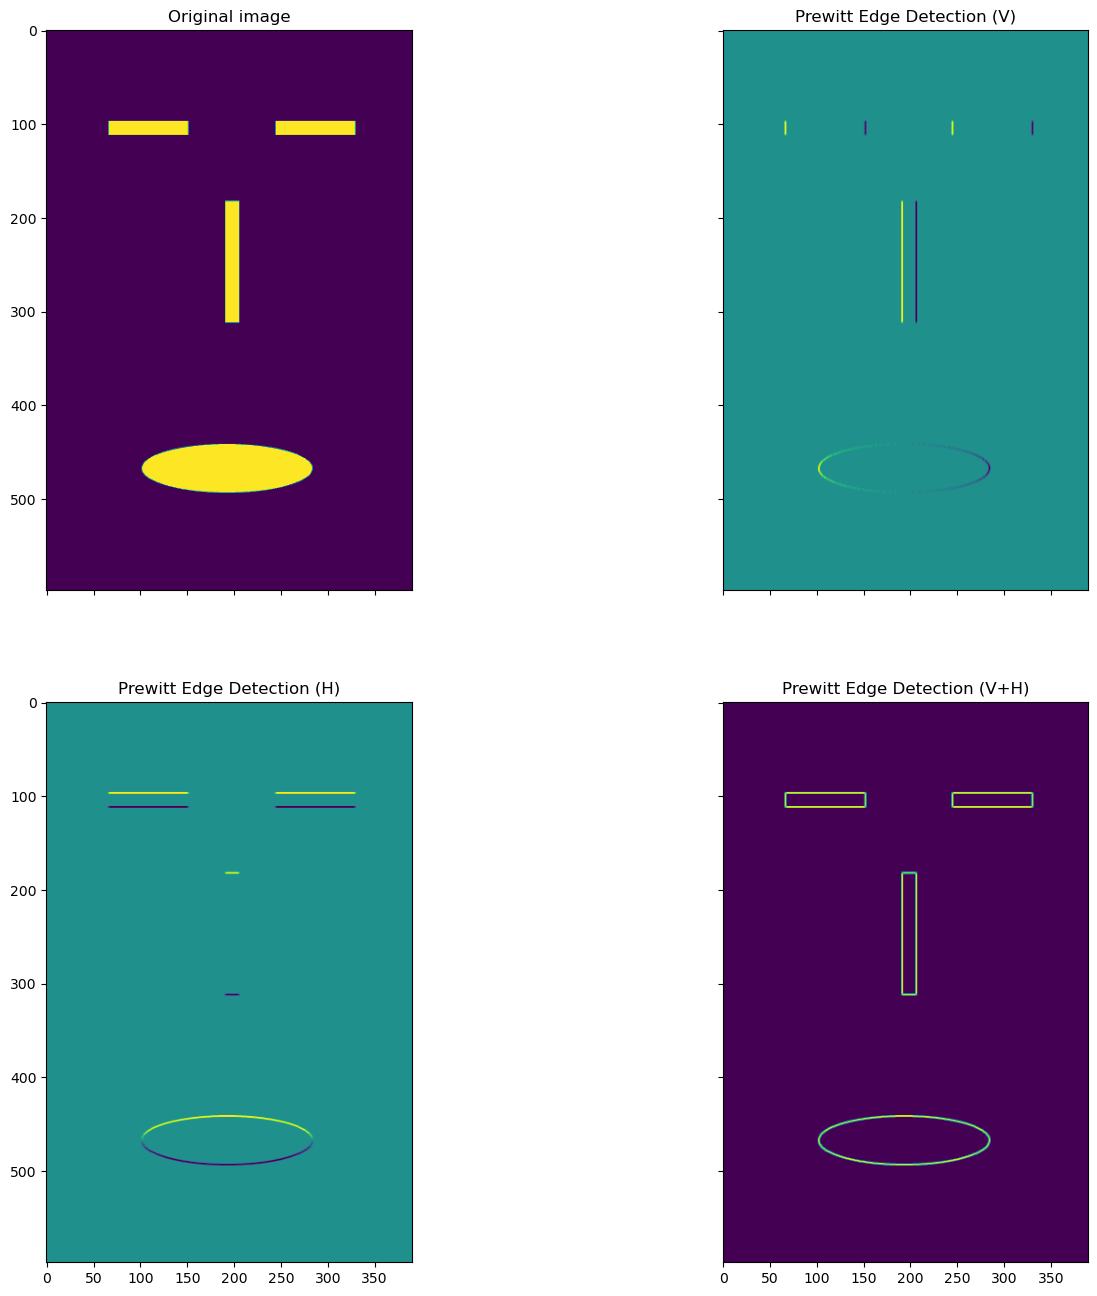

In [137]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(16, 16))
axes = axes.ravel()

axes[0].imshow(image)
axes[0].set_title('Original image')

axes[1].imshow(edges_prewitt_vertical)
axes[1].set_title('Prewitt Edge Detection (V)')

axes[2].imshow(edges_prewitt_horizontal)
axes[2].set_title('Prewitt Edge Detection (H)')

axes[3].imshow(edges_prewitt)
axes[3].set_title('Prewitt Edge Detection (V+H)')

Outro exemplo, desta vez usando uma imagem real.

<center><img src='../img/cute_cat.jpeg'></center>


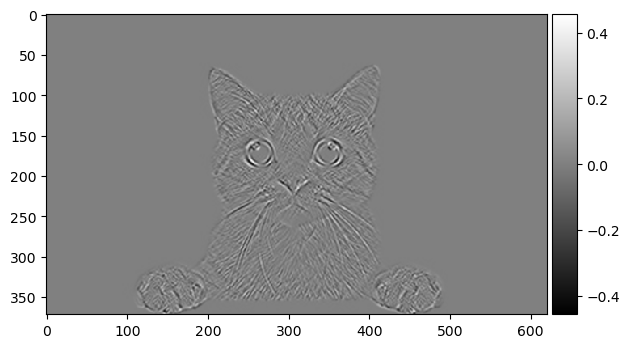

In [138]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v,prewitt
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
url = "../img/cute_cat.jpeg"
image = imread(url, as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(edges_prewitt_horizontal)

imshow(edges_prewitt_vertical, cmap='gray')

Esse [link](https://setosa.io/ev/image-kernels/) apresenta uma interface interativa que permite obter uma intuição sobre como filtros funcionam.

Esse outro [link](https://theailearner.com/tag/prewitt-operator/) fornece uma visão geral sobre outros filtros.

## Camada de Pooling

Uma camada de pooling (ou camada de amostragem) é uma operação que reduz a dimensionalidade dos mapas de características (feature maps) gerados pelas camadas convolucionais anteriores. 
O objetivo principal do pooling é diminuir a resolução espacial dos mapas de características, reduzindo assim a quantidade de parâmetros e cálculos na rede, além de ajudar a controlar o overfitting.

Existem diferentes tipos de operações de pooling, mas as mais comuns são:

- Max Pooling: Seleciona o valor máximo em cada janela de pooling.
- Average Pooling: Calcula a média dos valores em cada janela de pooling.
 
Benefícios da Camada de Pooling
1. Redução da Dimensionalidade: Reduz a resolução espacial dos mapas de características, o que diminui o número de parâmetros e cálculos na rede.
2. Controle de Overfitting: Ao reduzir a dimensionalidade, o pooling ajuda a evitar o overfitting, pois força a rede a aprender características mais robustas e invariantes.
3. Invariância à Translação: Pooling introduz uma forma de invariância à translação, já que pequenas mudanças na posição dos elementos dos mapas de características têm menos impacto após a operação de pooling.

Considerações
- Tamanho da Janela e Stride: O tamanho da janela de pooling e o stride são hiperparâmetros importantes que devem ser escolhidos cuidadosamente, pois influenciam diretamente a redução da dimensionalidade.
- Tipo de Pooling: A escolha entre max pooling e average pooling depende do problema específico e das características dos dados. Max pooling é mais comum, pois tende a capturar características salientes melhor do que average pooling.

Camadas de subamostragem (POOL) são usadas para realizar a operação homônima (*downsampling*) sobre o volume de entrada. O efeito dessa operação é a diminuição da quantidade de pixels no volume de saída. 

Normalmente, essa operação gera uma perda de qualidade no volume de saída quando comparado ao volume de entraga. Isso é ilustrado na imagem abaixo (fonte). Como compensação, essa operação diminui a quantidade de parâmetros do modelo e consequentemente pode servir para combater o *overfitting*.

<center><img src='https://cs231n.github.io/assets/cnn/pool.jpeg'></center>

Há suas formas de implementar a operação de subamostragem, *max pooling* e *average pooling*. Essas operações são ilustradas na imagem a seguir.
<center><img src='https://www.researchgate.net/profile/Alla-Eddine-Guissous/publication/337336341/figure/fig15/AS:855841334898691@1581059883782/Example-for-the-max-pooling-and-the-average-pooling-with-a-filter-size-of-22-and-a_W640.jpg'></center>

Uma alternativa ao uso de camadas POOL é usar camadas CONV com stride maior do que 1. Mais detalhes sobre isso podem ser obtidos no artigo [Striving for Simplicity: The All Convolutional Net](https://arxiv.org/abs/1412.6806).

# Classificação de imagens sobre o CIFAR10

Nesta parte, vamos treinar uma rede neural convolucional para aprender a classificar imagens. Vamos usar o conjunto de dados [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html), que contém 60000 imagens, cada uma das quais pertence a uma de dez classes. A figura abaixo apresenta algumas imagens desse conjunto de dados para cada uma das dez classes existentes.

<center><img src='https://miro.medium.com/max/700/1*6XQqOifwnmplS22zCRRVaw.png'></center>

Vamos começar importando os pacotes necessários.

In [139]:
import os
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

Vamos agora fazer o download do conjunto de dados.

In [140]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: ./cifar10.tgz


O conjunto de dados vem em um formato bastante conhecido em sistemas Unix, o tgz. O trecho de código a seguir extrai os dados deste arquivo.

In [141]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

O conjunto de dados é extraído para o diretório `.data/cifar10`. Os exemplos estão contidos em duas pastas, `train` e` test`, que correspondem ao conjunto de treinamento (50.000 imagens) e ao conjunto de teste (10.000 imagens), respectivamente. Cada uma dessas pastas por sua vez contém 10 subpastas, uma para cada classe de imagens. Vamos verificar isso usando `os.listdir`.

In [142]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'horse', 'cat', 'frog', 'truck', 'bird', 'ship', 'dog', 'deer', 'automobile']


A estrutura de diretórios descritaacima (uma pasta por classe) é usada para organizar muitos conjuntos de dados na área de Visão Computacional, e a maioria das bibliotecas de aprendizado profundo fornecem utilitários para trabalhar com tais conjuntos de dados. No PyTorch, podemos usar a classe `ImageFolder` do pacote `torchvision` para carregar os dados como tensores.

In [143]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

Vamos examinar o primeiro exemplo do conjunto de treinamento.

In [144]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

A lista de classes é armazenada na propriedade `.classes` do conjunto de dados. O rótulo numérico de cada elemento corresponde ao índice do rótulo do elemento na lista de classes.

In [145]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Podemo visualizar a imagem do exemplo correspondente ao índice.

Label:  airplane (0)


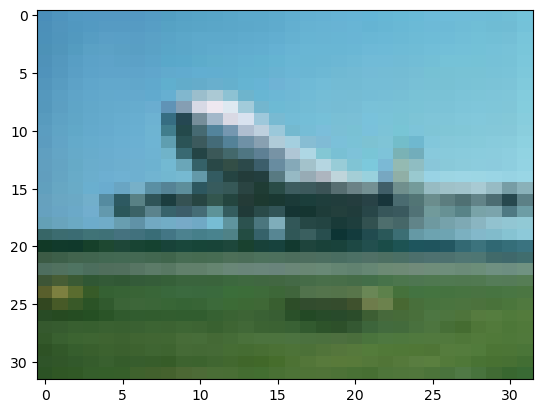

In [146]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0), aspect='auto')

show_example(*dataset[100])

Outro exemplo:

Label:  deer (4)


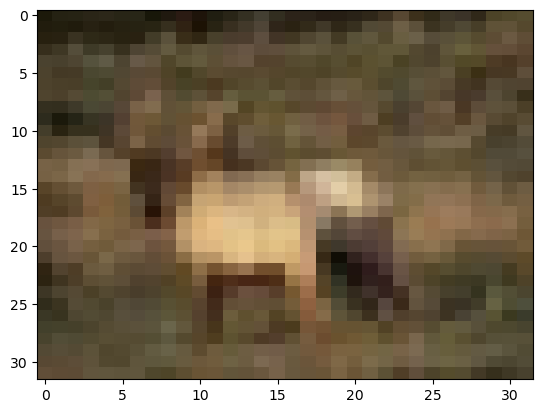

In [147]:
show_example(*dataset[20000])

## Preparação dos conjuntos de dados

In [148]:
random_seed = 42
torch.manual_seed(random_seed);

val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [149]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

Com o uso de uma função utilitária, podemos visualizar o conjunto de imagens contido em um lote como um mosaico.

In [150]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

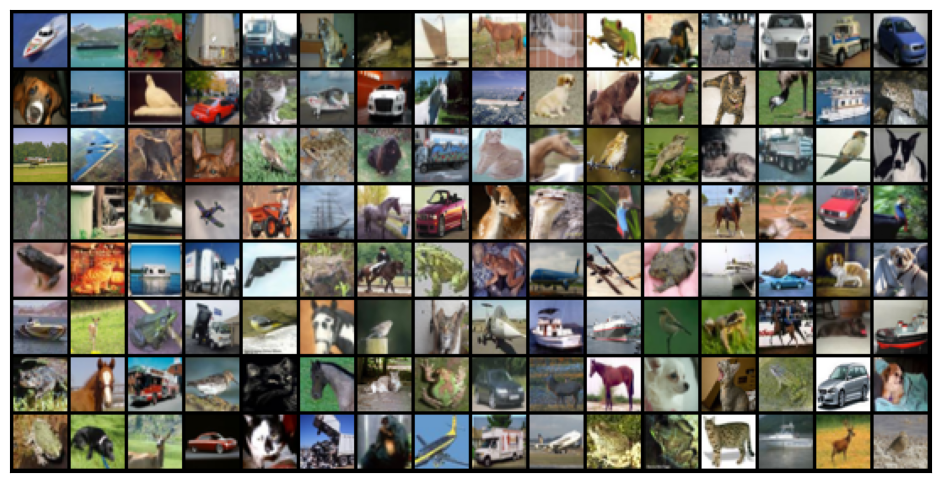

In [151]:
show_batch(train_dl)

## Definição do modelo

In [152]:
import torch.nn as nn
import torch.nn.functional as F

simple_model = nn.Sequential(
    nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [153]:
# Define the CNN Model
class CIFAR10_CNN(nn.Module):
    def __init__(self):
        super(CIFAR10_CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [154]:
model = CIFAR10_CNN()
model

CIFAR10_CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=256, bias=True)
    (2): ReLU()
    (3): Dr

In [155]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([-0.5341,  0.0177, -0.0727,  0.7633,  0.7220,  0.1107,  0.0382, -0.5178,
        -0.0155, -0.2040], grad_fn=<SelectBackward0>)


## Treinamento

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10 - Train Loss: 1.3154 - Val Loss: 0.9710
Epoch 2/10 - Train Loss: 0.9794 - Val Loss: 0.8624
Epoch 3/10 - Train Loss: 0.8599 - Val Loss: 0.7620
Epoch 4/10 - Train Loss: 0.7908 - Val Loss: 0.7414
Epoch 5/10 - Train Loss: 0.7379 - Val Loss: 0.6974
Epoch 6/10 - Train Loss: 0.6870 - Val Loss: 0.6943
Epoch 7/10 - Train Loss: 0.6550 - Val Loss: 0.6536
Epoch 8/10 - Train Loss: 0.6268 - Val Loss: 0.6656
Epoch 9/10 - Train Loss: 0.6052 - Val Loss: 0.6311
Epoch 10/10 - Train Loss: 0.5757 - Val Loss: 0.6248


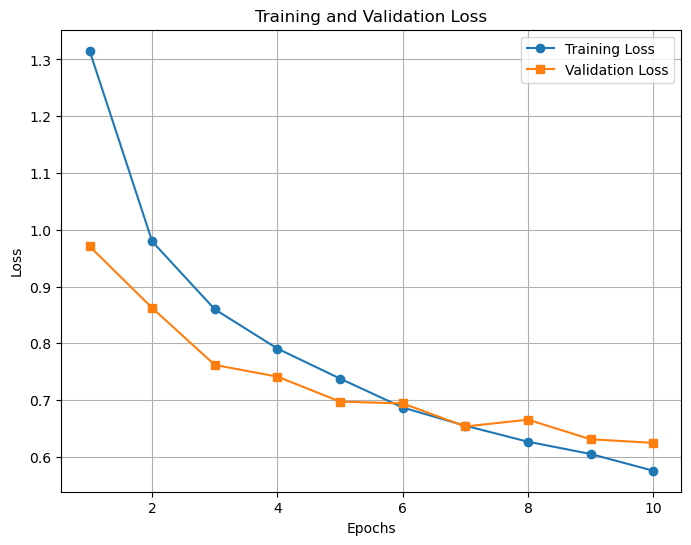

In [156]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CIFAR10_CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with loss tracking
epochs = 10
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
    
    avg_train_loss = running_train_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    
    avg_val_loss = running_val_loss / len(testloader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", marker="o")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Referências

- Luis Serrano: [A friendly introduction to Convolutional Neural Networks and Image Recognition](https://youtu.be/2-Ol7ZB0MmU)

- Vincent Dumoulin, Francesco Visin: [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285) 
- Animações no [github](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)
- Irhum Shafkat: [Intuitively understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- Sylvian Gugger: [Convolutions in Depth](https://sgugger.github.io/convolution-in-depth.html) (apresenta detalhes de implementação de uma camada de convolução 2D)